<a href="https://colab.research.google.com/github/nastya-andreeva/IntroductionToAI/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 4**

Андреева Анастасия

Группа: БИВТ-22-СП-3

Датасет: Application_Data

# Импорт данных

*1) Загрузить необходимые данные к себе и считать (read) их в переменную.*

In [13]:
import pandas as pd

data = pd.read_csv('Application_Data.csv', sep=',')
data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


# Задача

*2) Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.*

Целевая переменная - Status. Она может принимать только значения 0 или 1. Следовательно, это задача бинарной классификации.

# Предобработка данных

*А. Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.*

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Status', 'Applicant_ID'])  # признаки, за исключением Status и Applicant_ID
y = data['Status'] # целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # само разделение

print(f"Размер train выборки: {X_train.shape}") # строки столбцы
print(f"Размер test выборки: {X_test.shape}")

Размер train выборки: (20102, 19)
Размер test выборки: (5026, 19)


Для разделения данных на тренировочные и тестовые используется метод train_test_split из sklearn. Обычно данные делятся пропорционально 80:20 или 70:30.

---


test_size=0.2 - 20% в тестовую выборку

random_state=42 - случайное разбиение для воспроизводимости (свойство давать один и тот же результат при повторных данных)

stratify=y - одинаковое соотношение классов 0 и 1 в train и test (стратифицированное разбиение)

*B. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.*

In [15]:
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()
print("Пропуски в train:\n", missing_values_train)
print()
print("Пропуски в test:\n", missing_values_test)

Пропуски в train:
 Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
dtype: int64

Пропуски в test:
 Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Deb

Пропусков нет, значит использование стратегий не требуется.

*C. Отнормировать численные переменные (StandardScaler, MinMaxScaler).*

In [16]:
from sklearn.preprocessing import StandardScaler

num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns # выбираем численные переменные
scaler = StandardScaler() # нормализация
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])


StandardScaler - масштабирует данные так, чтобы среднее значение было равно 0, а стандартное отклонение было равно 1.

fit_transform - вычисляет параметры (среднее и стандратное отклонение) на тренировочных данных.

transform - преобразует тестовые данные, используя параметры, вычисленные на тренировочной выборке.


---

StandardScaler - масштабирует данные, преобразуя их в стандартное нормальное распределение с средним значением 0 и стандартным отклонением 1 (предпочтителен - если признаки близки к нормальному распределению, модель чувствительна к распределению данных, необходимо сохранить данные в изначальном масштабе).
MinMaxScaler - масштабирует данные в диапазон от 0 до 1 (или любой другой заданный диапазон) (предпочтителен - данные имеют четко определенный диапазон, все признаки нужно свести к одному масштабу, меньше выбросов или они не имеют влияния).



---

В датасете есть переменные с большим разбросом (например, Total_Income - диапазон от нескольких тысяч до миллионов), поэтому важно привести данные к стандартному нормальному распределению. MinMaxScaler был бы менее эффективен из-за экстремальных значений, так как он нормализует данные в диапазоне от 0 до 1, исходя из минимальных и максимальных значений.

*D. Закодировать категориальные признаки по одной из стратегий.*

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = X_train.select_dtypes(include=['object', 'category']).columns # находим категориальные столбцы
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse_output - результат в виде плотной матрицы (без разреженной), облегчает конкатенацию дальше
# handle_unknown - игнорировать ошибку неизвестных категорий (не было в тренировочных данных)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_columns]),
                           columns=encoder.get_feature_names_out(cat_columns)) # преобразование признаков в train

X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_columns]),
                          columns=encoder.get_feature_names_out(cat_columns)) # преобразование признаков в test

# объединение закодированных данных с числовыми признаками
X_train = pd.concat([X_train.drop(columns=cat_columns).reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_columns).reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)


OneHotEncoder - преобразует категориальные признаки в числовой формат. Для каждого уникального значения категориальной переменной создается новый бинарный столбец. Например, признак color со значениями red, green превратится в два столбца color_red, color_green.

# Оформление данных

*4) Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).*

In [27]:
from torch.utils.data import Dataset, DataLoader
import torch

class CustomDataset(Dataset):
#
    def __init__(self, X, y): # Х - признаки, у - целевые значения
        self.X = X.to_numpy(dtype='float32') # преобразование данных в numpy массивы
        self.y = y.to_numpy(dtype='float32')

    def __len__(self): # возвращает кол-во примеров в датасете
        return len(self.X)

    def __getitem__(self, idx): # извлекает пример по индексу idx и преобразует в тензоры PyTorch
        features = torch.tensor(self.X[idx], dtype=torch.float32) # извлекает строку признаков X, преобразует в тензор float32
        target = torch.tensor(self.y[idx], dtype=torch.float32) # извлекает строку признаков y, преобразует в тензор float32
        # тензоры (преобразование нечисловой информации в числовую форму) можно использовать для обучения нейронных сетей
        return features, target



train_dataset = CustomDataset(X_train, y_train) # признаки и целевые значения
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# train_dataset - набор данных для обучения, batch_size=32 - пакет по 32 примера за раз
# shuffle=True - перемешивание данных между эпохами (помогает избежать переобучения)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


DataLoader - эффективная загрузка данных, их упаковка в мини-батчи, поддерживает перемешивание данных

Батчи - пакеты данных, на которых выполняется обучение модели (множество примеров в виде тензоров)

# Обучение

*5) Обучить на тренировочном множестве:*

Потери - разница между предсказаниями модели и реальными значениями

Градиенты - производные функции потерь по отношению к параметрам модели (насколько сильно нужно изменить параметры модели, чтобы уменьшить ошибку)

Обратное распространение ошибки:

1. Прямой проход - вычисляются предсказания модели и вычилсяются потери

2. Обратное распространение ошибки - основывается на правиле цепочки из дифференциального исчисления и вычисляет градиенты функции потерь по каждому параметру модели

In [28]:
# model - модель, которая обучается
# criterion - функция потерь, вычисляющая ошибку модели
# optimizer - оптимизатор, который обновляет параметры модели
# num_epochs - кол-во эпох
# train_loader - DataLoader для обучающего набора данных
# test_loader - DataLoader для тестового набора данных
def train_and_evaluate(model, criterion, optimizer, num_epochs, train_loader, test_loader):

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()  # модель в режиме обучения
        running_loss = 0.0 # в процессе обучения

        for batch_features, batch_targets in train_loader:
            optimizer.zero_grad() # обнуляет градиенты всех параметров модели (в Torch они накапливаются на каждом шаге)
            batch_targets = batch_targets.view(-1, 1).type(torch.float32)
            outputs = model(batch_features) # данные передаются через модель, чтобы получить предсказания
            loss = criterion(outputs, batch_targets)
            loss.backward() # обратное распространение ошибки
            optimizer.step() # обновление параметров на основе вычисленных градиентов
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval() # модель в режиме оценки
        test_running_loss = 0.0 # тестовый набор данных

        with torch.no_grad():  # вычисление градиентов не требуется для тестирования
            for batch_features, batch_targets in test_loader:
                batch_targets = batch_targets.view(-1, 1).type(torch.float32)
                outputs = model(batch_features)
                loss = criterion(outputs, batch_targets)
                test_running_loss += loss.item()

        test_loss = test_running_loss / len(test_loader)
        test_losses.append(test_loss)

    return train_losses, test_losses

*А. Очень простую однослойную нейросеть с оптимизатором SGD*

Задача оптимизатора - найти такие значения параметров модели, при которых функция потерь достигает минимума

SGD - обновляет параметры модели, используя градиенты, вычисленные для ожного примера; фиксированная скорость обучения

Adam - позволяет изменять скорость обучения для каждого параметра, использует первый момент (среднее значение градиентов) и второй момент (среднее значение квадратов грвдиентов) для обновления

In [29]:
import torch.nn as nn
import torch.optim as optim
from torch.nn import BCEWithLogitsLoss

class SimpleNN(nn.Module): # создание простой однослойной нейросети

    def __init__(self, input_size, num_classes=1): # кол-во входных признаков и кол-во классов
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, 1) # создание первого линейного слоя

    def forward(self, x): # определяет, как нейронная сеть будет преобразовывать входные данные через свои слои
        return self.fc(x)

num_epochs = 150
learning_rate= 0.0001

model_a = SimpleNN(input_size=X_train.shape[1])

criterion_a = BCEWithLogitsLoss()

optimizer_a = optim.SGD(model_a.parameters(), lr=learning_rate) # создается SGD

BCEWithLogitsLoss - функция потерь для бинарной классификации

1. Логит-функция: на вход подаются не вероятности, а необработанные значения (логиты), функция применяет сигмоиду, чтобы преобразовать логиты в вероятности

2. Бинарная кросс-энтропия: вычисляется кросс-энтропийная потеря для бинарной классификации - разница между предсказанными вероятности и истинными метками (0 или 1)

*В. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam*

ReLU - преобразует входные данные

Если x больше или равно нулю, то ReLU(x) =x

Если х меньше нуля, то ReLU(x) = 0

In [30]:
class OneHiddenLayerNN(nn.Module): # создание модели с 1 скрытым слоем
    def __init__(self, input_size, hidden_size, num_classes=1):
      # input_size - кол-во входных признаков
      # hidden_sizes - список, содержащий кол-во нейронов в каждом скрытом слое
      # num_classes - кол-во выходных классов (по умолчанию 1 для бинарной классификации)
        super(OneHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()  # функция активации ReLU
        self.fc2 = nn.Linear(hidden_size, 1)  # один выходной нейрон для бинарной классификации

    def forward(self, x):
        x = self.fc1(x)  # через первый слой
        x = self.relu(x)  # применяется ReLU, которая добавляет нелинейность
        x = self.fc2(x)  # через второй слой
        return x

num_epochs = 150
learning_rate_adam = 0.0001

model_b = OneHiddenLayerNN(input_size=X_train.shape[1], hidden_size=64)

criterion_b = BCEWithLogitsLoss()

optimizer_b = optim.Adam(model_b.parameters(), lr=learning_rate_adam)

*С. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam*

In [31]:
class DeepNN(nn.Module): # многослойная нейросеть с 3+ скрытыми слоями
    def __init__(self, input_size, hidden_sizes, num_classes=1):
        super(DeepNN, self).__init__()

        self.layers = nn.ModuleList() # список для хранения всех слоев

        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        for i in range(1, len(hidden_sizes)): # цикл для создания скрытых слоев
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        self.layers.append(nn.Linear(hidden_sizes[-1], 1))

        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.relu(layer(x))

        x = self.layers[-1](x)
        return x


num_epochs = 150
learning_rate_adam = 0.0001
hidden_sizes_c = [128, 64, 32]

model_c = DeepNN(input_size=X_train.shape[1], hidden_sizes=hidden_sizes_c)

criterion_c = BCEWithLogitsLoss()


optimizer_c = optim.Adam(model_c.parameters(), lr=learning_rate_adam)

# Loss

*6) Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).*

In [32]:
train_losses_a, test_losses_a = train_and_evaluate(model_a, criterion_a, optimizer_a, num_epochs, train_loader, test_loader)

In [33]:
train_losses_b, test_losses_b = train_and_evaluate(model_b, criterion_b, optimizer_b, num_epochs, train_loader, test_loader)

In [34]:
train_losses_c, test_losses_c = train_and_evaluate(model_c, criterion_c, optimizer_c, num_epochs, train_loader, test_loader)

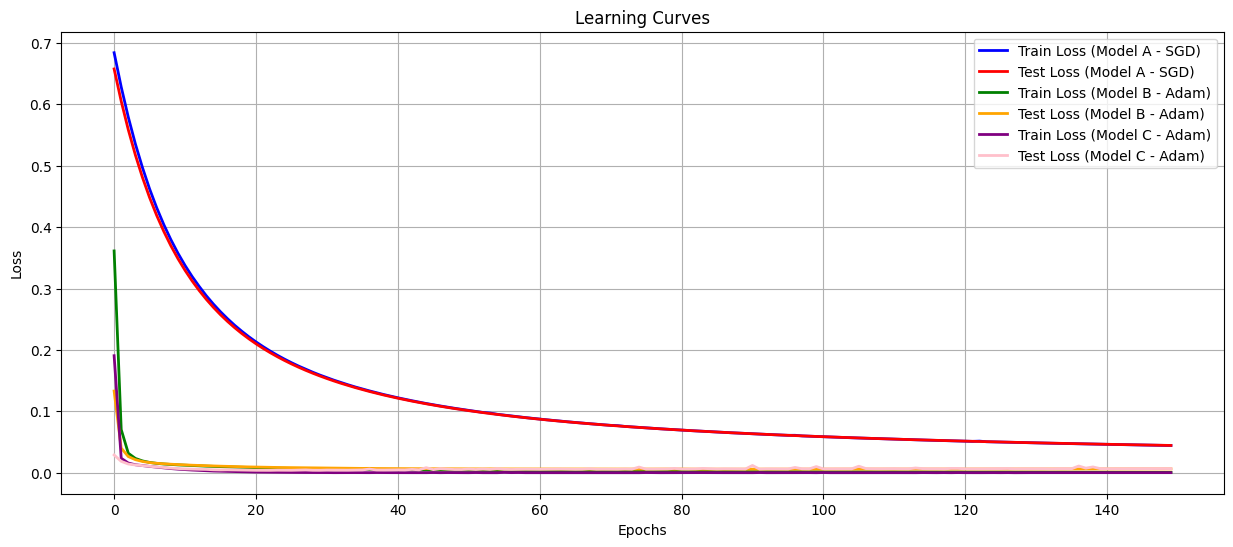

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# модель A (SGD)
plt.plot(train_losses_a, label='Train Loss (Model A - SGD)', color='blue', linewidth=2)
plt.plot(test_losses_a, label='Test Loss (Model A - SGD)', color='red', linewidth=2)

# модель B (Adam)
plt.plot(train_losses_b, label='Train Loss (Model B - Adam)', color='green', linewidth=2)
plt.plot(test_losses_b, label='Test Loss (Model B - Adam)', color='orange', linewidth=2)

# модель C (Adam)
plt.plot(train_losses_c, label='Train Loss (Model C - Adam)', color='purple', linewidth=2)
plt.plot(test_losses_c, label='Test Loss (Model C - Adam)', color='pink', linewidth=2)

plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Метрики

*7) Посчитайте метрики на train и test множествах:*

*Для задачи классификации -- Accuracy*

In [36]:
def calculate_accuracy(model):
    model.eval()
    with torch.no_grad():
        # тренировка
        correct_train = 0
        total_train = 0

        for batch_features, batch_targets in train_loader:  # проходим по тренировочным батчам
            outputs_train = model(batch_features)  # получаем предсказания
            predicted_train = (torch.sigmoid(outputs_train) >  0.5).float()  # применяем sigmoid для получения вероятностей
            total_train += batch_targets.size(0)  # суммируем количество примеров
            correct_train += (predicted_train.view(-1) == batch_targets).sum().item()  # считаем количество правильных предсказаний

        accuracy_train = correct_train / total_train

        # тест
        correct_test = 0
        total_test = 0

        for batch_features_test, batch_targets_test in test_loader:
            outputs_test = model(batch_features_test)
            predicted_test = (torch.sigmoid(outputs_test) > 0.5).float()
            total_test += batch_targets_test.size(0)
            correct_test += (predicted_test.view(-1) == batch_targets_test).sum().item()

        accuracy_test = correct_test / total_test

    return accuracy_train, accuracy_test

accuracy_a_train, accuracy_a_test = calculate_accuracy(model_a)
accuracy_b_train, accuracy_b_test = calculate_accuracy(model_b)
accuracy_c_train, accuracy_c_test = calculate_accuracy(model_c)

print(f'Accuracy Model A - Train: {accuracy_a_train:.2f}, Test: {accuracy_a_test:.2f}')
print(f'Accuracy Model B - Train: {accuracy_b_train:.2f}, Test: {accuracy_b_test:.2f}')
print(f'Accuracy Model C - Train: {accuracy_c_train:.2f}, Test: {accuracy_c_test:.2f}')

Accuracy Model A - Train: 1.00, Test: 1.00
Accuracy Model B - Train: 1.00, Test: 1.00
Accuracy Model C - Train: 1.00, Test: 1.00


# Сравнение метрик

*8) Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:*

A. Какая модель справилась лучше с поставленной задачей? Все три модели справились одинаково хорошо.

B. Имеет ли место переобучение? Нет, точность на train и test одинакова.

C. Имеет ли место недообучение? Нет

D. Как можно улучшить метрики моделей? Нет необходимости в улучшениях.